In [3]:
using LinearAlgebra, Plots, Statistics
pythonplot();

In [17]:
function normcol!(A)
    for col in eachcol(A)
        col ./= norm(col)
    end;
    return A
end;
normcol(A) = normcol!(copy(A));

rankBound(n, d) = n.^d/factorial(d);

In [5]:
dims = unique(Int.(ceil.(5 .^ range(1, 2, length=15))))
ranks = unique(Int.(ceil.(10 .^ range(1, 3, length=15))));

In [6]:
println(dims)
println(ranks)

[5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 20, 23, 25]
[10, 14, 20, 27, 38, 52, 72, 100, 139, 194, 269, 373, 518, 720, 1000]


In [7]:
trials = 100;

In [9]:
d = 2;

In [21]:
eigmins = []
for r in ranks
    row = []
    for n in dims
        As = randn(trials, n, r)
        eigmins_ = []
        for i=1:trials
            A = normcol(As[i, :, :])
            G = (A'*A).^d
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, eigmins_)
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins)';

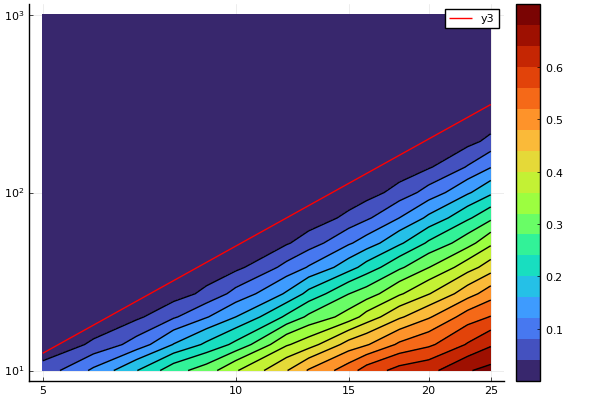

In [22]:
contourf(
    dims, ranks, abs.(mean.(eigmins)), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(mean.(eigmins)), 
    levels=20, 
    color=[:black],
)
plot!(dims, rankBound(dims, d), color=:red)

In [23]:
eigmins = []
for r in ranks
    row = []
    for n in dims
        As = randn(trials, d, n, r)
        eigmins_ = []
        for i=1:trials
            allA = As[i, :, :, :]

            G = ones(r, r)
            for j=1:d 
                A = normcol(allA[j, :, :])
                G = G .* (A'*A)
            end
            eigmin = minimum(eigvals(G))
            push!(eigmins_, eigmin)
        end
        push!(row, eigmins_)
    end
    push!(eigmins, row)
end
eigmins = reduce(hcat, eigmins)';

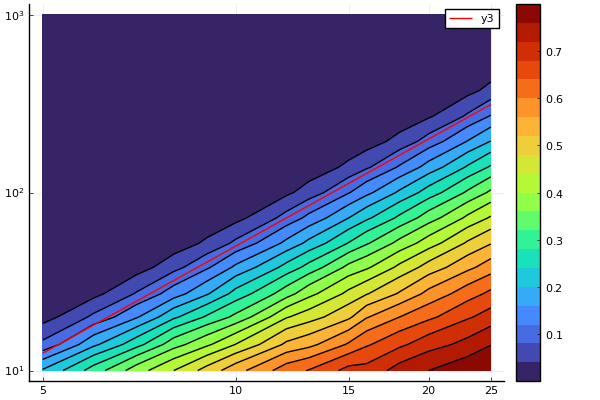

In [24]:
contourf(
    dims, ranks, abs.(mean.(eigmins)), 
    levels=20, 
    color=:turbo,
    xticks = ([5:5:25;], ["5", "10", "15", "20", "25"]),
    xscale = :log10,
    yscale = :log10,
    lw = 1
)
contour!(
    dims, ranks, abs.(mean.(eigmins)), 
    levels=20, 
    color=[:black],
)
plot!(dims, rankBound(dims, d), color=:red)